#### Import Libraries

In [2]:
import os
import requests 
import pandas_datareader as pdr

import functools
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 227

#### Import Ticker Data

In [3]:
#start_date = '1995'
#end_date = '2004'

start_date = '2003'
end_date='2006'

budget = 5000000


# S&P 500
ticker = "^GSPC"
#ticker = "FB"

In [4]:
stock_df = pdr.get_data_yahoo(ticker, start_date, end_date)
#stock_df.to_csv('data/'+ticker.upper()+'.csv')

In [5]:
# stock_df.head()
stock_df.tail()
# stock_df.describe()

print('No Missing Data') if sum(stock_df.isna().sum())==0 else stock_df.isna().sum()

No Missing Data


In [6]:
stock_df = stock_df.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1)
stock_df

,Close
Date,
2003-01-02,909.030029
2003-01-03,908.590027
2003-01-06,929.010010
2003-01-07,922.929993
2003-01-08,909.929993
...,...
2005-12-23,1268.660034
2005-12-27,1256.540039
2005-12-28,1258.170044


# Buy 

In [7]:
int_days = 30
days = str(int_days)

deviations = 2

In [8]:
stock_df[days+'_Mean'] = stock_df.Close.rolling(window=int_days).mean()
stock_df[days+'_Max'] = stock_df.Close.rolling(window=int_days).max()
stock_df[days+'_Min'] = stock_df.Close.rolling(window=int_days).min()

stock_df[days+'Price_Var'] = (stock_df.Close - stock_df[days+'_Mean']) / stock_df[days+'_Mean']
stock_df[days+'Max_Var'] = (stock_df[days+'_Max'] - stock_df.Close) / stock_df[days+'_Max']
stock_df[days+'Min_Var'] = (stock_df.Close - stock_df[days+'_Min']) / stock_df[days+'_Min']

stock_df[days+'_Upper'] = stock_df.Close.rolling(window=int_days).std()*deviations + stock_df[days+'_Mean']
stock_df[days+'_Lower'] = stock_df[days+'_Mean'] - stock_df.Close.rolling(window=int_days).std()*deviations

stock_df[days+'_pct_roll'] = stock_df[days+'Price_Var'].rolling(window=int_days).mean()
stock_df[days+'_pct_std'] = stock_df[days+'Price_Var'].rolling(window=int_days).std()
stock_df[days+'_pct_std_upper'] = stock_df[days+'_pct_roll'] + stock_df[days+'_pct_std']*deviations
stock_df[days+'_pct_std_lower'] = stock_df[days+'_pct_roll'] - stock_df[days+'_pct_std']*deviations


In [9]:
stock_df['Signal'] = stock_df[days+'Min_Var']

In [10]:
stock_df

,Close,30_Mean,30_Max,30_Min,30Price_Var,30Max_Var,30Min_Var,30_Upper,30_Lower,30_pct_roll,30_pct_std,30_pct_std_upper,30_pct_std_lower,Signal
Date,,,,,,,,,,,,,,
2003-01-02,909.030029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-03,908.590027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-06,929.010010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-07,922.929993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-08,909.929993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-12-23,1268.660034,1257.340662,1272.73999,1229.010010,0.009003,0.003206,0.032262,1281.464750,1233.216573,0.023217,0.010999,0.045215,0.001220,0.032262
2005-12-27,1256.540039,1258.067997,1272.73999,1229.010010,-0.001215,0.012728,0.022400,1280.635503,1235.500492,0.022228,0.011815,0.045858,-0.001402,0.022400
2005-12-28,1258.170044,1258.881665,1272.73999,1229.010010,-0.000565,0.011448,0.023726,1279.498497,1238.264833,0.021294,0.012476,0.046247,-0.003659,0.023726


# Plot

In [11]:
def price_char(stock_df): 
    fig, ax = plt.subplots(figsize=(30,10))

    ax.plot(stock_df.Close, label='Close Price')

    ax.plot(stock_df[days+'_Mean'], label=days+' Day Rolling Mean', color='orange')
    ax.plot(stock_df[days+'_Upper'], label=days+' Day Upper Bound', color='orange', linewidth=0.5)
    ax.plot(stock_df[days+'_Lower'], label=days+' Day Lower Bound', color='orange', linewidth=0.5)

    ax.fill_between(stock_df.index, stock_df[days+'_Upper'], stock_df[days+'_Lower'], color='orange', alpha=0.2)

    ax.plot(stock_df[days+'_Max'], color='red', label=days+' Day Maximum Price')
    ax.plot(stock_df[days+'_Min'], color='red', label=days+' Day Mininium Price')

    ax.legend(loc=2)
    ax.set_title(days+' Day Price Chart', fontsize=20)


In [12]:
def avgs_std(stock_df): 
    plt.figure(figsize=(30,10))

    plt.plot(stock_df[days+'Price_Var'], label=days+' Price Variance')
    plt.plot(stock_df[days+'_pct_roll'], label=days+' Day Rolling Variance Mean', color='green')
    plt.fill_between(stock_df.index, stock_df[days+'_pct_std_upper'], stock_df[days+'_pct_std_lower'], color='orange', alpha=0.2)

    plt.axhline(y=0, color='black', linewidth=1, linestyle='--')

    plt.legend(loc=2)
    plt.title(days+' Day Averages and STD', fontsize=20)

In [13]:
def var_plot(stock_df): 
    plt.figure(figsize=(30,10))

    plt.plot(stock_df[days+'Price_Var'], label='Variance from Rolling Mean Price', color='orange')
    plt.plot(stock_df[days+'Min_Var'], label='Variance from Minimum', color='darkred')
    plt.plot(stock_df[days+'Max_Var'], label='Variance from Maxiumm', color='green')

    plt.legend(loc=2)
    plt.title(days+' Variance', fontsize=20)

In [14]:
def sig_vs_close(stock_df): 
    fig, ax = plt.subplots(figsize=(30,10))

    ax.plot(stock_df.Close, label='Close Price', color='blue')
    ax.legend(loc=2)
    ax.set_ylabel('Close Price', fontsize=15)

    ax2 = ax.twinx()

    ax2.plot(stock_df.Signal, label='Signal', color='lightgreen')
    ax2.legend(loc=1)
    ax2.set_ylabel('Variance', fontsize=15)

    ax2.set_title(days+' Signal VS. Close Price', fontsize=25)

# Function

In [15]:
def filter_min_var(stock, budget, filter, show_graph=True, show_return=True):
    stock = stock.reset_index()
    state_check = lambda x, y: 1 if x < y else 0
    prev_state = state_check(filter, stock.loc[0].Signal)
    
    stock_amt = 0 
    net = []
    money = budget
    n = len(stock)

    for i in range(1,n): 
        today = stock.iloc[i]
        state = state_check(filter, today.Signal)

        if state != prev_state: 
            #BUY
            if (filter < today.Signal) and (money != 0): 
                stock_amt = int(money/today.Close) 
                money = 0
                net.append([today.Date, today.Close, 1, stock_amt * today.Close]) 
            #SELL
            if (filter > today.Signal) and (stock_amt != 0): 
                money = stock_amt * today.Close
                stock_amt = 0 
                net.append([today.Date, today.Close, 0, money])
        
        prev_state = state 
    profit = net[-1][3] - budget

    if show_return == True: 
        print('Number of Trades: ', len(net))
        print('Time Frame: {} days'.format((net[-1][0] - net[0][0]).days))
        print('Profit: ${:.2f} | {}%'.format(profit, round(profit/budget*100,2)))

    if show_graph == True: 
        trading_history(stock.set_index('Date'),net)


    return profit, net

In [22]:
def trading_history(stock, net, std=2): 
    plt.figure(figsize=(30,10))
    plt.style.use('seaborn-whitegrid')

    plt.plot(stock.index, stock.Close, color='darkblue', label='Close Price')
    plt.plot(stock.index, stock[days+'_Min'], color='pink', label=days+' Rolling Minimum Price')
    plt.plot(stock.index, stock[days+"_Upper"], color='orange', alpha=0.3)
    plt.plot(stock.index, stock[days+'_Lower'], color='orange', alpha=0.3)
    plt.fill_between(stock.index, stock[days+'_Upper'], stock[days+'_Lower'], color='orange', alpha=0.1, label='Bollinger Bands')
    
    plt.title('Trading History of {}'.format(ticker.upper()), fontsize=20)
    plt.ylabel('Price',fontsize=15)
    plt.xlim(stock.index.min(), stock.index.max())

    for i in net: 
        if i[2] == 1: color='green' 
        else: color='red' 
        plt.plot_date(i[0], i[1], color=color) 

    plt.plot_date([],[], label='Buy', c='green')
    plt.plot_date([],[], label='Sell', c='red') 

    plt.legend(frameon=True, loc=1, ncol=1, fontsize=12, borderpad=0.8)
    plt.show()

Number of Trades:  54
Time Frame: 1049 days
Profit: $1802719.90 | 36.05%


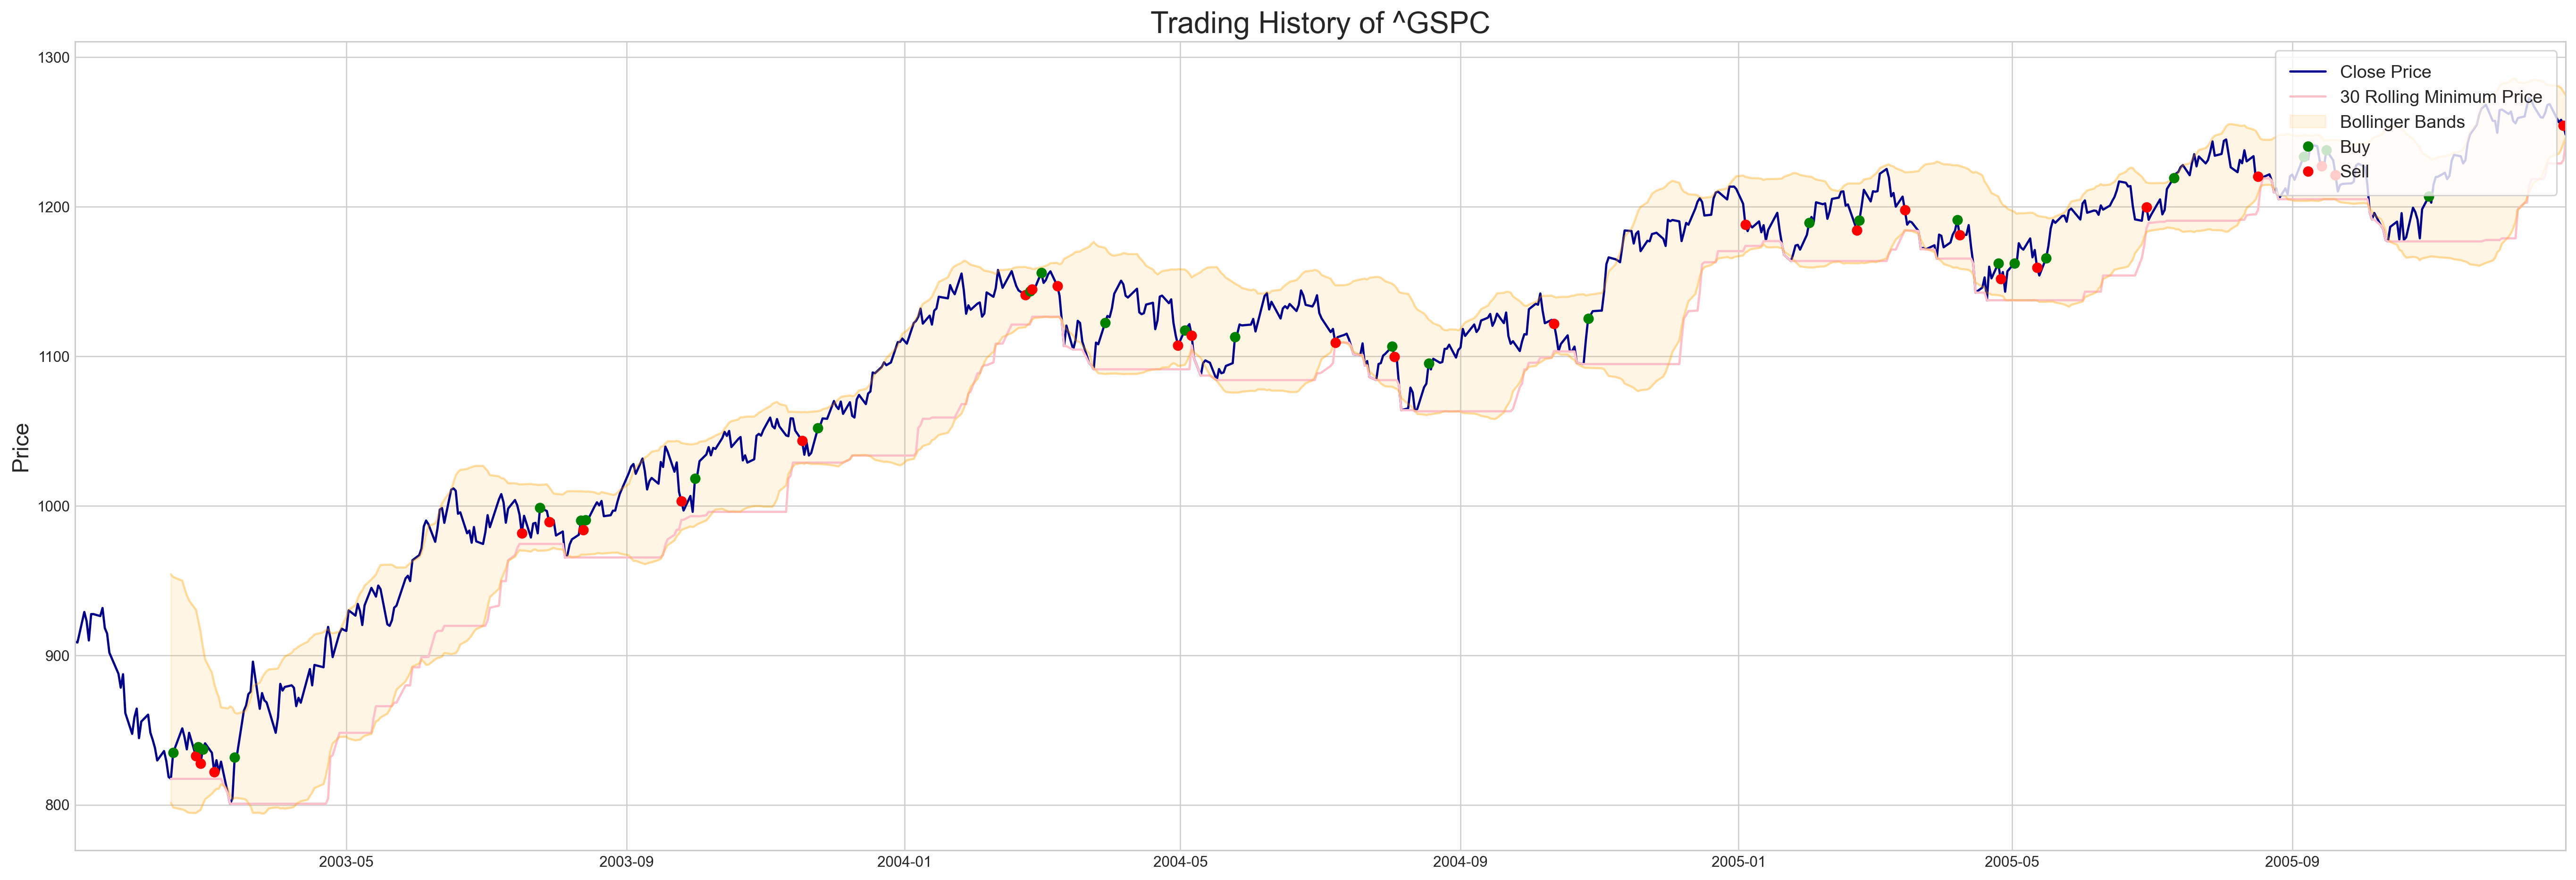

(1802719.8983154297,
 [[Timestamp('2003-02-14 00:00:00'), 834.8900146484375, 1, 4999321.407714844],
  [Timestamp('2003-02-24 00:00:00'), 832.5800170898438, 0, 4985489.142333984],
  [Timestamp('2003-02-25 00:00:00'), 838.5700073242188, 1, 4985298.6935424805],
  [Timestamp('2003-02-26 00:00:00'), 827.5499877929688, 0, 4919784.677429199],
  [Timestamp('2003-02-27 00:00:00'), 837.280029296875, 1, 4919020.172119141],
  [Timestamp('2003-03-04 00:00:00'), 821.989990234375, 0, 4829191.192626953],
  [Timestamp('2003-03-13 00:00:00'), 831.9000244140625, 1, 4829179.641723633],
  [Timestamp('2003-07-17 00:00:00'), 981.72998046875, 0, 5698942.536621094],
  [Timestamp('2003-07-25 00:00:00'), 998.6799926757812, 1, 5698468.038208008],
  [Timestamp('2003-07-29 00:00:00'), 989.280029296875, 0, 5644831.847167969],
  [Timestamp('2003-08-12 00:00:00'), 990.3499755859375, 1, 5644004.510864258],
  [Timestamp('2003-08-13 00:00:00'), 984.030029296875, 0, 5607987.136962891],
  [Timestamp('2003-08-14 00:00:00'),

In [27]:
filter_min_var(stock_df, budget, 0.02)